# Hodgkin Huxley Neurons

The Hodgkin-Huxley neuron is a biophysical model of a neuron, described in 1952 by Alan Lloyd Hodgkin and Andrew Fielding Huxley. 

It is a model of current flow into neurons, describing ion channels and the movement of ions across the cell membrane. 

The Hodgkin-Huxley neuron models sodium (Na) channels, potassium (K) channels and a leak channel.

<img src="img/HogdkinHuxley.png" width="300px">

## Mathematical Notation

In the following equations:
- $ I $ represents `current`
- $ V $ represents `voltage`
- $ C $ represents `capacitance`
- $ g $ represents `conductance`

### General Model

The current flowing across the cell membrane can be written as:

$$ I_c = C_m \frac{dV_m}{d_t} $$

The current of a given ion channel is:

$$ I_i = g_i (V_m - V_i) $$

In this equation, $ V_m $ is the membrane potential, and $ V_i $ is the reversal potential of the $ i $-th ion channel. 

The reversal potential is the membrane potential at which there is no net flow of an ion. 

Or, the reversal potential is the voltage that, if you go past it, the direction of movement of a given ion will change. 

The reversal potential reflects the balance of electrical and concentration gradients. 

The total current across the membrane, for a cell with Na and K channels, is:

$$ I = C_m \frac{dV_m}{d_t} + g_K(V_m - V_K) + g_{Na} (V_m - V_Na) + g_l(V_m - V_l) $$

### Channl Kinetics

When we add channel kinetics, the full equation looks like:

$$ I = C_m \frac{dV_m}{d_t} + g_K n^4 (V_m - V_K) + g_{Na} m^3h (V_m - V_Na) + g_l(V_m - V_l) +$$

Here we have added `n`, `m`, `h` which reflect channel activity, as:
- `n` : K channel activation
- `m` : Na channel activation
- `h` : Na channel inactivation

These values vary over, dependent on voltage, depndent on the following equations:

$$ \frac{dn}{dt} = \alpha_n(V_m)(1 - n) - \beta_n(V_m)n $$

$$ \frac{dm}{dt} = \alpha_m(V_m)(1 - m) - \beta_m(V_m)m $$

$$ \frac{dh}{dt} = \alpha_h(V_m)(1 - h) - \beta_h(V_m)h $$

In the above, $ \alpha_i $ and $ \beta_i $ are rate constants for the ion channels. 

## Hodgkin Huxley Code

Next, let's explore an implementation of the Hodgkin-Huxley model in code. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# Set random seed (for reproducibility)
np.random.seed(1000)

### Model Settings

In [3]:
gK = 36.0    # Average potassium channel conductance per unit area (mS/cm^2)
gNa = 120.0  # Average sodoum channel conductance per unit area (mS/cm^2)
gL = 0.3     # Average leak channel conductance per unit area (mS/cm^2)

Cm = 1.0     # Membrane capacitance per unit area (uF/cm^2)

VK = -12.0   # Potassium reversal potential (mV)
VNa = 115.0  # Sodium reversal potential (mV)
Vl = 10.613  # Leak reversal potential (mV)

## Functions

In [4]:
# Potassium ion-channel rate functions

def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp(1.0 - (0.1 * Vm)) - 1.0)

def beta_n(Vm):
    return 0.125 * np.exp(-Vm / 80.0)

# Sodium ion-channel rate functions

def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (np.exp(2.5 - (0.1 * Vm)) - 1.0)

def beta_m(Vm):
    return 4.0 * np.exp(-Vm / 18.0)

def alpha_h(Vm):
    return 0.07 * np.exp(-Vm / 20.0)

def beta_h(Vm):
    return 1.0 / (np.exp(3.0 - (0.1 * Vm)) + 1.0)
  
# n, m, and h steady-state values

def n_inf(Vm=0.0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))

def m_inf(Vm=0.0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))

def h_inf(Vm=0.0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))

In [5]:
def compute_derivatives(y, t0):
    """Compute the derivatives for the Hodgkin-Huxley model."""
    
    dy = np.zeros((4,))
    
    Vm = y[0]
    
    n = y[1]
    m = y[2]
    h = y[3]
    
    # dVm/dt
    GK = (gK / Cm) * np.power(n, 4.0)
    GNa = (gNa / Cm) * np.power(m, 3.0) * h
    GL = gL / Cm
    
    dy[0] = (Id(t0) / Cm) - (GK * (Vm - VK)) - (GNa * (Vm - VNa)) - (GL * (Vm - Vl))
    
    # dn/dt
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    
    # dm/dt
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    
    # dh/dt
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)
    
    return dy

### Run our Hodgkin-Huxley Model

In [6]:
# Input stimulus
def Id(t):
    
    if 0.0 < t < 1.0:
        return 150.0
    elif 10.0 < t < 11.0:
        return 50.0
    return 0.0

In [7]:
# Start and end time (in milliseconds)
tmin = 0.0
tmax = 50.0

# Time values
T = np.linspace(tmin, tmax, 10000)

In [8]:
# State (Vm, n, m, h)
Y = np.array([0.0, n_inf(), m_inf(), h_inf()])

# Solve ODE system
# Vy = (Vm[t0:tmax], n[t0:tmax], m[t0:tmax], h[t0:tmax])
Vy = odeint(compute_derivatives, Y, T)

In [9]:
# Input stimulus
Idv = [Id(t) for t in T]

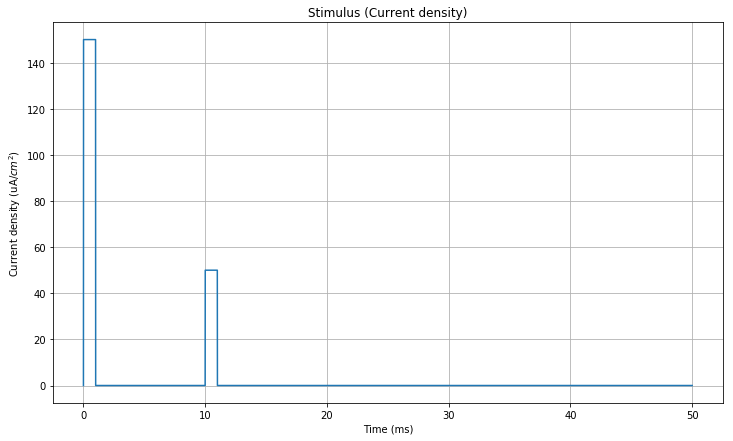

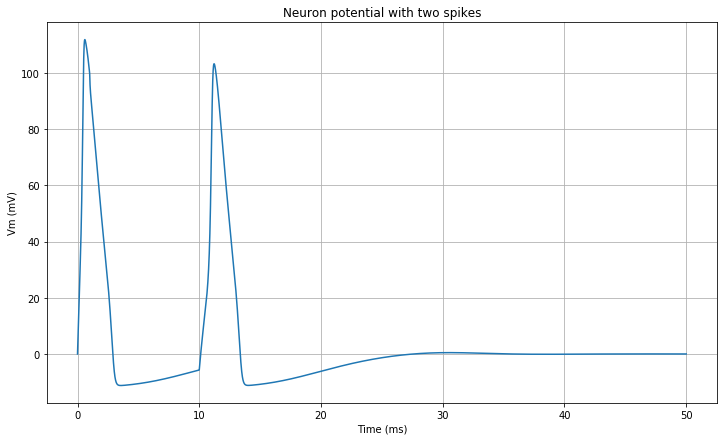

In [10]:
# Plot our model activity
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(T, Idv)
ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'Current density (uA/$cm^2$)')
ax.set_title('Stimulus (Current density)')
plt.grid()

# Neuron potential
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(T, Vy[:, 0])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neuron potential with two spikes')
plt.grid()

### Limit Cycles

One way to explore these kinds of models is to explore how different parameters vary over time together.

One way to do so is to plot, across time, one parameter against another, which is called a 'limit cycle' plot.

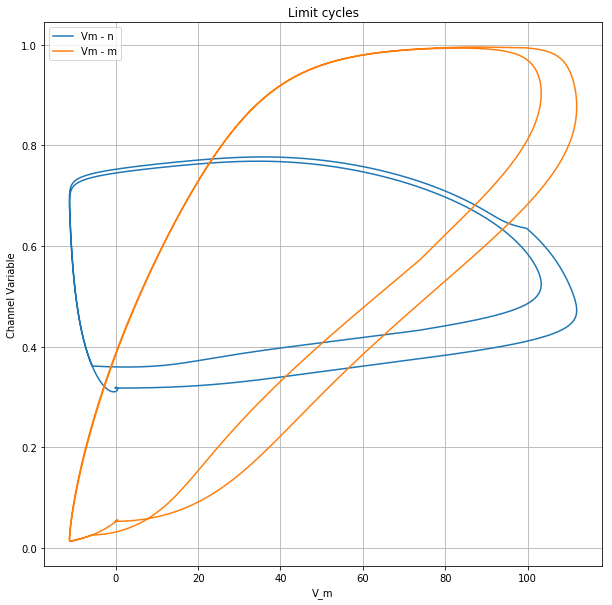

In [11]:
# Trajectories with limit cycles
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(Vy[:, 0], Vy[:, 1], label='Vm - n')
ax.plot(Vy[:, 0], Vy[:, 2], label='Vm - m')
ax.set_title('Limit cycles')
ax.set_xlabel('V_m')
ax.set_ylabel('Channel Variable')
ax.legend()
plt.grid()

### More simulations

For the next set of simulations, we will use a slightly different implementation of the Hodgking Huxley model.

In [12]:
from hh import *

In [13]:
# Create a hodgkin huxley cell
HH = HodgkinHuxley()

X = odeint(integrate_hh, [-65, 0.05, 0.6, 0.32], HH.t, args=(HH,))

V = X[:,0]
m = X[:,1]
h = X[:,2]
n = X[:,3]

ina = HH.I_Na(V, m, h)
ik = HH.I_K(V, n)
il = HH.I_L(V)

### Plot variables from our model

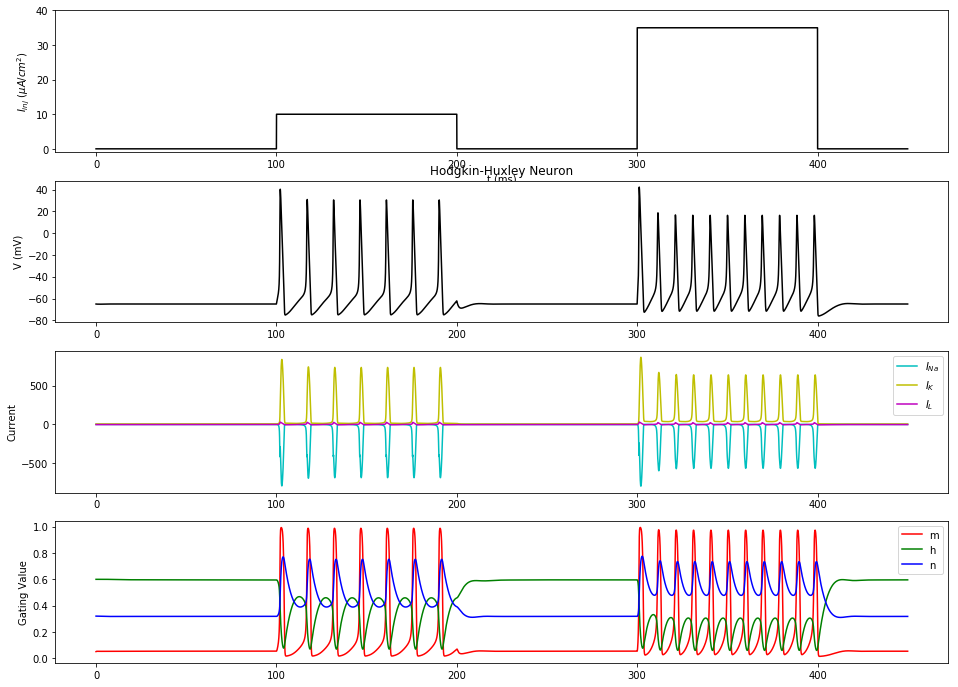

In [14]:
plt.figure(figsize=(16, 12))

plt.subplot(4,1,1)
i_inj_values = [HH.I_inj(t) for t in HH.t]
plt.plot(HH.t, i_inj_values, 'k')
plt.xlabel('t (ms)')
plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
plt.ylim(-1, 40)

plt.subplot(4,1,2)
plt.title('Hodgkin-Huxley Neuron')
plt.plot(HH.t, V, 'k')
plt.ylabel('V (mV)')

plt.subplot(4,1,3)
plt.plot(HH.t, ina, 'c', label='$I_{Na}$')
plt.plot(HH.t, ik, 'y', label='$I_{K}$')
plt.plot(HH.t, il, 'm', label='$I_{L}$')
plt.ylabel('Current')
plt.legend()

plt.subplot(4,1,4)
plt.plot(HH.t, m, 'r', label='m')
plt.plot(HH.t, h, 'g', label='h')
plt.plot(HH.t, n, 'b', label='n')
plt.ylabel('Gating Value')
plt.legend()